# PART 1 - PROSPER LOAN EXPLORATION


### by OKONKWO CHUKWUEBUKA MALCOM

## TABLE OF CONTENTS 

1. [INTRODUCTION](#INTRODUCTION)

2. [IMPORTING LIBRARIES AND LOADING DATASETS](#IMPORTING-LIBRARIES-AND-LOADING-DATASETS)

3. [DATA WRANGLING](#DATA-WRANGLING)

4. [EXPLORATORY DATA ANALYSIS](#EXPLORATORY-DATA-ANALYSIS)
    - [UNIVARIATE ANALYSIS](#UNIVARIATE-ANALYSIS) 
    - [BIVARIATE ANALYSIS](#BIVARIATE-ANALYSIS)
    - [MULTIVARIATE ANALYSIS](#MULTIVARIATE-ANALYSIS)
    
5. [CONCLUSION](#CONCLUSION)

## INTRODUCTION

The dataset contains information of about 150K loaners that patronizes Prosper Loan. It has information about the loaners credit scores, loan status, employment status, occupation, amongst other variables. 

Each Field (columns) are described [Here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

## IMPORTING LIBRARIES AND LOADING DATASETS

#### To import the libraries to be used for this project

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

#### Importing and Loading the Dataset

In [3]:
# loading dataset into 'loan_data' dataframe
loan = pd.read_csv('prosperLoanData.csv')

## DATA WRANGLING

The **prosper loan dataset** has been loaded. This section would be used to understand the structure of the data, select the features of the dataset to be used for my analysis and clean the dataset.   

In [4]:
# to get the shape of the dataset
loan.shape

(113937, 81)

In [5]:
# to observe the columns in the dataset
loan.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# to look at the columns in the dataset
loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

.

### What is the structure of the dataset?

The dataset has 113937 records and 81 fields. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There are about 20 variables I need to support my investigation out of the 81 variables in the dataset. 

In the cell below, I would list all the variables needed for this analysis which would be used to subset the dataframe

In [7]:
# columns needed for the analysis

columns = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore', 
           'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'TotalInquiries', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 
           'LoanOriginalAmount', 'Recommendations']

# to confirm the length of the list (columns)
len(columns)

20

Before a Data cleaning process, It is best practice to create a copy of the dataframe

In [8]:
# creating a copy of the dataframe
loancopy = loan.copy()

In [9]:
# to subset the loancopy dataset to have only columns needed for analysis
loancopy = loancopy[columns]

### Data Assessment 

To assess the subsetted data for exploratory data analysis

In [10]:
# to check the shape of the subset dataframe
loancopy.shape

(113937, 20)

In [11]:
# to look at the columns of the dataframe
loancopy.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term',
       'LoanStatus', 'BorrowerAPR', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'TotalInquiries', 'DebtToIncomeRatio',
       'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'Recommendations'],
      dtype='object')

To get the column definition of the selected columns

- **ListingKey**: Unique key for each listing, same value as the 'key' used in the listing object in the API.
- **ListingNumber**: The number that uniquely identifies the listing to the public as displayed on the website.
- **ListingCreationDate**: The date the listing was created.
- **Term**: The length of the loan expressed in months.
- **LoanStatus**: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- **BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan.
- **ProsperScore**: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
- **ListingCategory (numeric)**: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- **BorrowerState**: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- **Occupation**: The Occupation selected by the Borrower at the time they created the listing.
- **EmploymentStatus**: The employment status of the borrower at the time they posted the listing.
- **EmploymentStatusDuration**: The length in months of the employment status at the time the listing was created.
- **IsBorrowerHomeowner**: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- **CurrentlyInGroup**: Specifies whether or not the Borrower was in a group at the time the listing was created.
- **TotalInquiries**: Total number of inquiries at the time the credit profile was pulled.
- **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- **IncomeRange**: The income range of the borrower at the time the listing was created.
- **StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.
- **LoanOriginalAmount**: The origination amount of the loan.
- **Recommendations**: Number of recommendations the borrower had at the time the listing was created.

In [12]:
# to check the first 5 rows in the dataframe
loancopy.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,TotalInquiries,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,Recommendations
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,NaN,0,CO,Other,Self-employed,2.0,True,True,3.0,0.17,"$25,000-49,999",3083.333333,9425,0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,7.0,2,CO,Professional,Employed,44.0,False,False,5.0,0.18,"$50,000-74,999",6125.000000,10000,0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,NaN,0,GA,Other,Not available,NaN,False,True,1.0,0.06,Not displayed,2083.333333,3001,0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,1.0,0.15,"$25,000-49,999",2875.000000,10000,0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,4.0,2,MN,Executive,Employed,44.0,True,False,9.0,0.26,"$100,000+",9583.333333,15000,0


#### To perform more assessment on the dataframe

In [13]:
# to check for information about the dataset
loancopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingNumber              113937 non-null  int64  
 2   ListingCreationDate        113937 non-null  object 
 3   Term                       113937 non-null  int64  
 4   LoanStatus                 113937 non-null  object 
 5   BorrowerAPR                113912 non-null  float64
 6   ProsperScore               84853 non-null   float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   BorrowerState              108422 non-null  object 
 9   Occupation                 110349 non-null  object 
 10  EmploymentStatus           111682 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  CurrentlyInGroup           11

In [14]:
# to check for number of duplicate records
sum(loancopy.duplicated())

0

There are no duplicate records in the dataset. To investigate further, I would be checking for duplicates listing key, listing number and the two fields combined 

In [15]:
# to check if there are duplicate listingkey records
sum(loancopy['ListingKey'].duplicated())

871

In [16]:
# to check if there are duplicate listingNumber records
sum(loancopy['ListingNumber'].duplicated())

871

In [17]:
# to check for duplicates for both fields
sum(loancopy[['ListingKey', 'ListingNumber']].duplicated())

871

There are 871 duplicate records for listingkey and listingNumber. Before deciding what to do with them, I would first observe all the duplicate records to check for patterns

In [18]:
# to observe the duplicate records
loancopy[loancopy[['ListingKey', 'ListingNumber']].duplicated(keep = False)]

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,TotalInquiries,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,Recommendations
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,36,Current,0.07620,9.0,7,IL,Food Service,Employed,269.0,True,False,6.0,0.25,"$25,000-49,999",3333.333333,10000,0
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,36,Current,0.07620,11.0,7,IL,Food Service,Employed,269.0,True,False,6.0,0.25,"$25,000-49,999",3333.333333,10000,0
29,0F563597161095613517437,1051243,2013-12-17 09:18:33.220000000,36,Current,0.15223,6.0,1,LA,Other,Employed,16.0,True,False,12.0,0.32,"$100,000+",10416.666667,35000,0
176,106335993636414276CB477,1119836,2014-01-08 14:27:50.320000000,36,Current,0.32446,3.0,3,WA,Sales - Commission,Employed,108.0,False,False,3.0,0.06,"$75,000-99,999",6250.000000,4000,0
313,09233589620788733CFB8CE,930842,2013-09-25 08:03:11.860000000,36,Current,0.19144,3.0,1,KY,Professional,Self-employed,78.0,True,False,4.0,NaN,"$100,000+",13333.333333,15000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113548,FB6A35999320129979DBBA3,1158474,2014-01-23 14:33:25.967000000,60,Current,0.22063,8.0,18,CO,Other,Employed,0.0,True,False,2.0,0.15,"$75,000-99,999",7666.666667,14000,0
113636,D9BF3589576999233477E75,904020,2013-09-17 11:44:43.177000000,36,Current,0.21290,6.0,1,WI,NaN,Other,0.0,True,False,2.0,0.20,"$25,000-49,999",2500.000000,4000,0
113733,E2303594522341016B8EE15,1002326,2013-11-07 14:26:31.317000000,60,Current,0.20593,8.0,1,WI,Skilled Labor,Employed,280.0,False,False,1.0,0.42,"$50,000-74,999",4583.333333,10000,0
113773,DE8535960513435199406CE,1056749,2013-12-06 05:43:13.830000000,36,Current,0.16324,6.0,1,NJ,Other,Employed,26.0,True,False,7.0,0.36,"$25,000-49,999",2720.833333,10000,0


Looking at the records with duplicate ListingKey and ListingNumber, I observed that other columns such as ListingCreationDate, BorrowerAPR etc have different values for each duplicate records. I would keep the records and use them for my analysis. 

To assess the dataframe further

In [19]:
# to check the datatype of the columns
loancopy.dtypes

ListingKey                    object
ListingNumber                  int64
ListingCreationDate           object
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
ProsperScore                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
CurrentlyInGroup                bool
TotalInquiries               float64
DebtToIncomeRatio            float64
IncomeRange                   object
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
Recommendations                int64
dtype: object

The datatype of ListingCreationDate has to be chnaged to Datetime

In [20]:
# to change the datatype
loancopy['ListingCreationDate'] = pd.to_datetime(loancopy['ListingCreationDate'])

# to check if the changes were made
loancopy.dtypes

ListingKey                           object
ListingNumber                         int64
ListingCreationDate          datetime64[ns]
Term                                  int64
LoanStatus                           object
BorrowerAPR                         float64
ProsperScore                        float64
ListingCategory (numeric)             int64
BorrowerState                        object
Occupation                           object
EmploymentStatus                     object
EmploymentStatusDuration            float64
IsBorrowerHomeowner                    bool
CurrentlyInGroup                       bool
TotalInquiries                      float64
DebtToIncomeRatio                   float64
IncomeRange                          object
StatedMonthlyIncome                 float64
LoanOriginalAmount                    int64
Recommendations                       int64
dtype: object

The ListingCategory was encoded [Here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). 

The encoding for ListingCategory: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

A column will created to decode the ListingCategory encoding

In [21]:
# decoding Listing Category
category = {0: "Not Available", 1: "Debt Consolidation", 2: "Home Improvement", 3: "Business", 4: "Personal Loan", 
            5: "Student Use", 6: "Auto", 7: "Other", 8: "Baby&Adoption", 9: "Boat", 10: "Cosmetic Procedure",
            11: "Engagement Ring", 12: "Green Loans", 13: "Household Expenses", 14: "Large Purchases", 15: "Medical/Dental",
            16: "Motorcycle", 17: "RV", 18: "Taxes", 19: "Vacation", 20: "Wedding Loans"}

# the column used to encode listing category
loancopy['ListingCategory'] = loancopy['ListingCategory (numeric)'].replace(category)

In [22]:
# to check if the chnages have been made
assert "ListingCategory" in loancopy.columns

In [23]:
# to check the unique values in ListingCategory to be sure all the changes were made
loancopy['ListingCategory'].unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

ListingKey                       0
ListingNumber                    0
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
CurrentlyInGroup                 0
TotalInquiries                1159
DebtToIncomeRatio             8554
IncomeRange                      0
StatedMonthlyIncome              0
LoanOriginalAmount               0
Recommendations                  0
ListingCategory                  0
dtype: int64


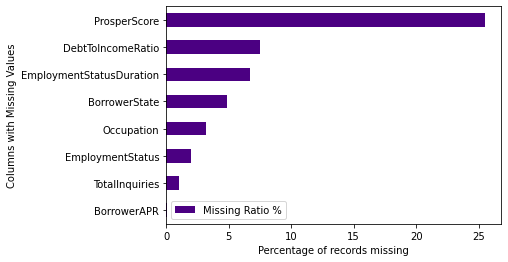

In [24]:
# to check for null values in each columns
null = loancopy.isna().sum()
print(null)

# creating a function to plot the number of null values
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending= True)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", color = "indigo")
        plt.ylabel("Columns with Missing Values", fontsize = 10)
        plt.xlabel("Percentage of records missing", fontsize = 10)
        plt.show()
    else:
        print('No NAs found')
        

plot_nas(loancopy)
plot_width, plot_height = (10, 10)
plt.rcParams['figure.figsize'] = (plot_width, plot_height)

From the chart above, Prosperscore has the most missing values with close 25% of the records missing. 

In [25]:
# to check for the number of unique records for each columns 
loancopy.nunique()

ListingKey                   113066
ListingNumber                113066
ListingCreationDate          113064
Term                              3
LoanStatus                       12
BorrowerAPR                    6677
ProsperScore                     11
ListingCategory (numeric)        21
BorrowerState                    51
Occupation                       67
EmploymentStatus                  8
EmploymentStatusDuration        605
IsBorrowerHomeowner               2
CurrentlyInGroup                  2
TotalInquiries                  102
DebtToIncomeRatio              1207
IncomeRange                       8
StatedMonthlyIncome           13502
LoanOriginalAmount             2468
Recommendations                  17
ListingCategory                  21
dtype: int64

To check the descriptive statistics of the numerical columns in the dataframe

In [26]:
loancopy.describe()

,ListingNumber,Term,BorrowerAPR,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,TotalInquiries,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,Recommendations
count,1.139370e+05,113937.000000,113912.000000,84853.000000,113937.000000,106312.000000,112778.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,6.278857e+05,40.830248,0.218828,5.950067,2.774209,96.071582,5.584405,0.275947,5.608026e+03,8337.01385,0.048027
std,3.280762e+05,10.436212,0.080364,2.376501,3.996797,94.480605,6.429946,0.551759,7.478497e+03,6245.80058,0.332353
min,4.000000e+00,12.000000,0.006530,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,4.009190e+05,36.000000,0.156290,4.000000,1.000000,26.000000,2.000000,0.140000,3.200333e+03,4000.00000,0.000000
50%,6.005540e+05,36.000000,0.209760,6.000000,1.000000,67.000000,4.000000,0.220000,4.666667e+03,6500.00000,0.000000
75%,8.926340e+05,36.000000,0.283810,8.000000,3.000000,137.000000,7.000000,0.320000,6.825000e+03,12000.00000,0.000000
max,1.255725e+06,60.000000,0.512290,11.000000,20.000000,755.000000,379.000000,10.010000,1.750003e+06,35000.00000,39.000000


.

## EXPLORATORY DATA ANALYSIS 

Exploratory data analysis will be used in this section to examine the data in order to find patterns, identify anomalies, test hypotheses, and verify presumptions with the aid of summary statistics and graphical representations. The **""Question-Visualization-Observations" framework** would be used. This framework involves asking a question from the data, creating a visualization to find answers, and then recording observations.

This would be broken down into Univariate Analysis, Bivariate Analysis and Multivariate Analysis.

### UNIVARIATE ANALYSIS

Analyzing just one variable is referred to as univariate analysis. To comprehend the distribution of values for a single variable, univariate analysis is used.


I will start by looking into the number of loan listings. According to [Law Insider](https://www.lawinsider.com/dictionary/loan-listing#:~:text=Loan%20Listing%20means%20a%20request,the%20terms%20of%20a%20Loan), Loan Listing means a request by a Borrower to borrow money on the terms of a Loan. 

In [27]:
# to get the number of loan listing
def loan_count(df):
    count = len(df)
    print(count)
    
loan_count(loancopy)

113937


From the Dataset, there are 113,937 loan listings (loan requests) to borrow money

#### Question: What is the distribution of loans in each term?

36    87778
60    24545
12     1614
Name: Term, dtype: int64


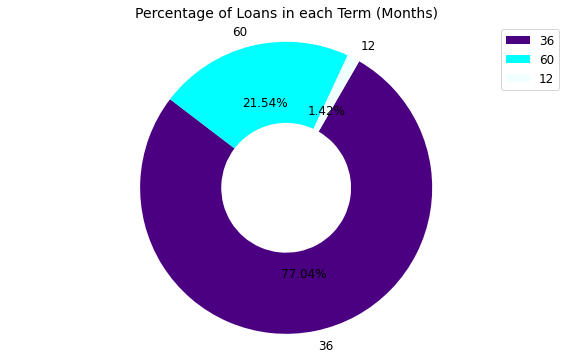

In [28]:
# the visualization
# first lets check the number of loan in each term
def pieplot(y):
    term_counts = loancopy[y].value_counts()
    print(term_counts)

    # to represent it in a pie plot
    plt.figure(figsize = (10,6))
    labels = term_counts.index
    plt.pie(term_counts, labels = labels, radius = 1.8, autopct = '%0.2f%%', colors = ['indigo', 'cyan', 'azure'],
            textprops = {'fontsize' : 12}, startangle= 60, counterclock= False, wedgeprops= {'width' : 1.0});
    plt.axis('equal')
    plt.legend(loc = 'upper right', fontsize = 12)
   
    
    
# to plot the pie plot
pieplot('Term')
plt.title('Percentage of Loans in each Term (Months)', fontsize = 14 )
plt.show();

**Observation**: Most of the Loan listing are 36 months long. A low amount of loans are 12 months.

#### Question: What is the distribution of loans in each loan status?

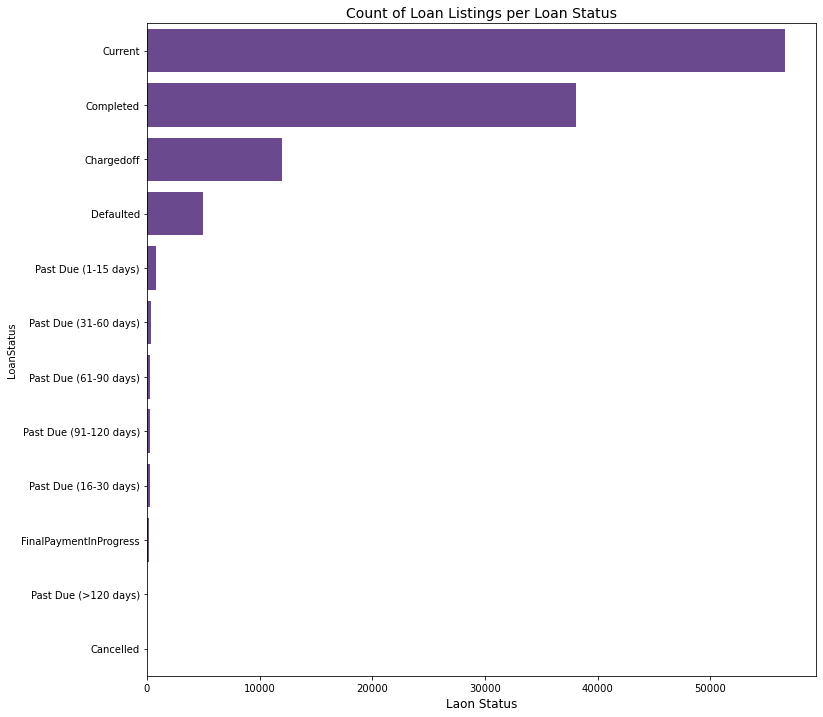

In [29]:
# the visualization
def countploty(y):
    plt.figure(figsize = [12,12])
    base_color = sns.color_palette("Paired")[9]
    sns.countplot(data=loancopy, y = y, color = base_color, order = loancopy[y].value_counts().index)

# to plot the count plot
countploty('LoanStatus')
plt.xlabel('Laon Status', fontsize = 12)
plt.title('Count of Loan Listings per Loan Status', fontsize = 14)
plt.show();

**Observation**: Most of the Loan listing are in the current and completed loan status.

#### Question: What is the distribution of Borrowers APR (Annual Percentage Rate)?

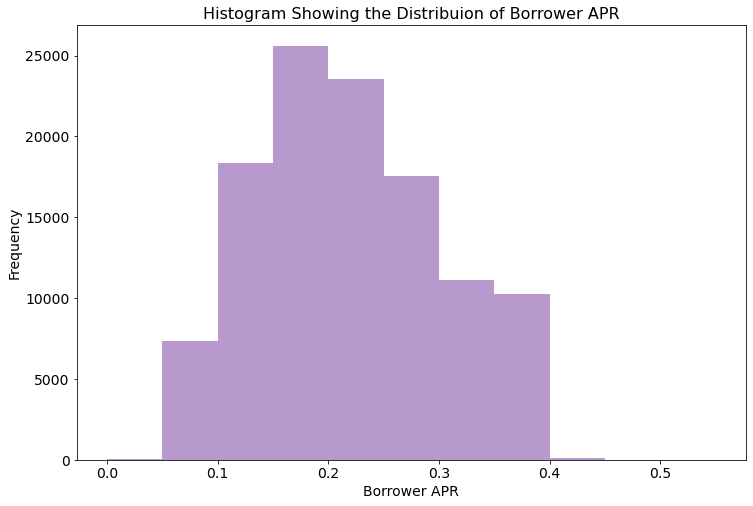

In [30]:
# the visualization
def distplot(x, y):
    plt.figure(figsize=[12,8])
    bins = np.arange(0, loancopy[x].max() + y, y)
    sns.distplot(loancopy[x], kde = False, bins = bins, color= 'indigo');
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    
    
# the distplot
distplot('BorrowerAPR', 0.05)
plt.xlabel("Borrower APR", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.title("Histogram Showing the Distribuion of Borrower APR", fontsize= 16)
plt.show();

**Observation**: Most of the Loan listing have an Annual percentage rate between 15% to 25%.

#### Question: What is the distribution of loan listings for Borrowers who are Home Owner ?

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64


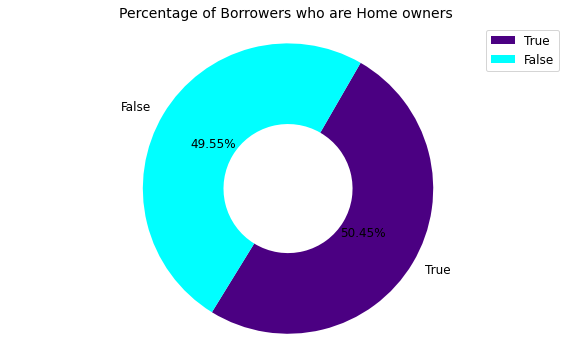

In [31]:
# the visualization
pieplot('IsBorrowerHomeowner')
plt.title('Percentage of Borrowers who are Home owners', fontsize = 14 )
plt.show();

**Observation**: Borrowers who are Home Owners are 50.45% percent from the chart above

#### Question: What is the count of Borrowers state?

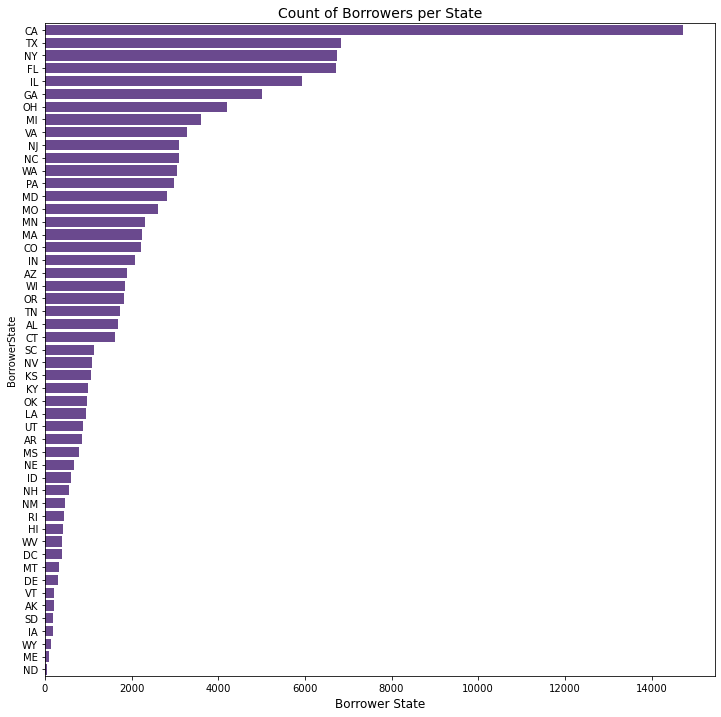

In [32]:
# visualization
countploty('BorrowerState')
plt.xlabel('Borrower State', fontsize = 12)
plt.title('Count of Borrowers per State', fontsize = 14)
plt.show();

**Observation**: Borrowers are mostly from Canada, Texas, New York, Florida and Illinois.

#### Question: What is the distribution of Borrowers and their employment status?

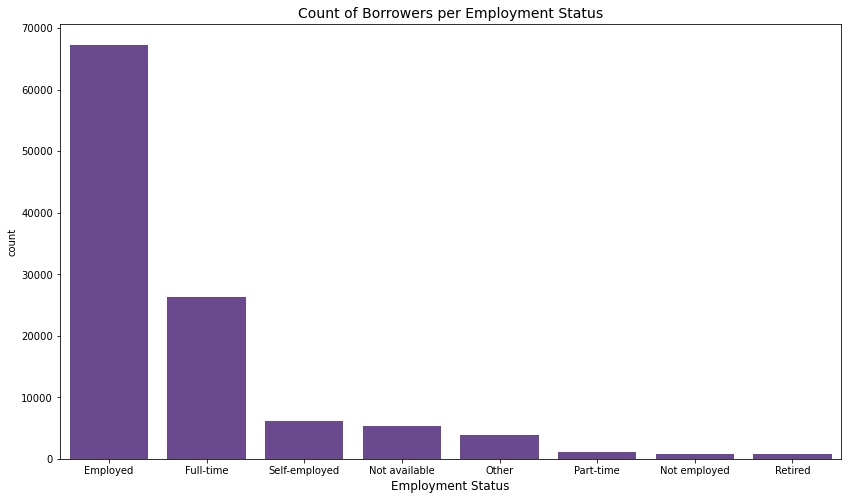

In [33]:
# the vizualization

def countplotx(y):
    plt.figure(figsize = [14,8])
    base_color = sns.color_palette("Paired")[9]
    sns.countplot(data=loancopy, x = y, color = base_color, order = loancopy[y].value_counts().index)

# the countplot
countplotx('EmploymentStatus')
plt.xlabel('Employment Status', fontsize = 12)
plt.title('Count of Borrowers per Employment Status', fontsize = 14)
plt.show();

**Observation**: Most of the Borrowers are Employed.

#### Question: What is the distribution of Borrowers monthly income?

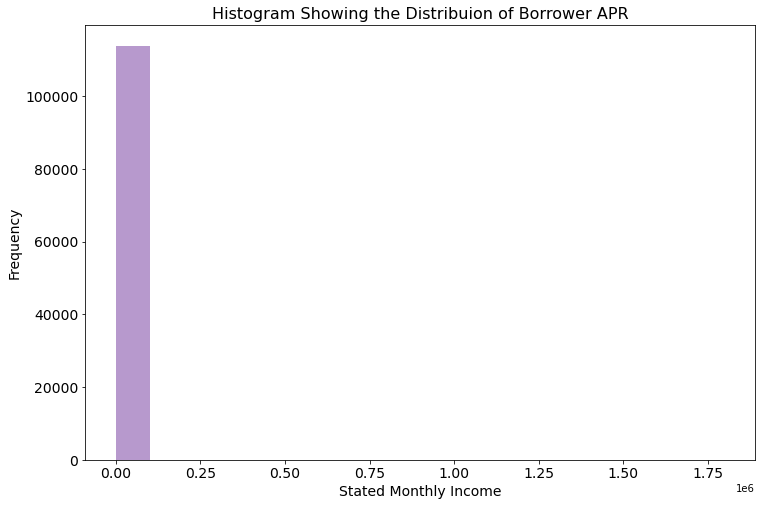

In [34]:
# the visualization
distplot('StatedMonthlyIncome', 100000)
plt.xlabel("Stated Monthly Income", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.title("Histogram Showing the Distribuion of Borrower APR", fontsize= 16)
plt.show();

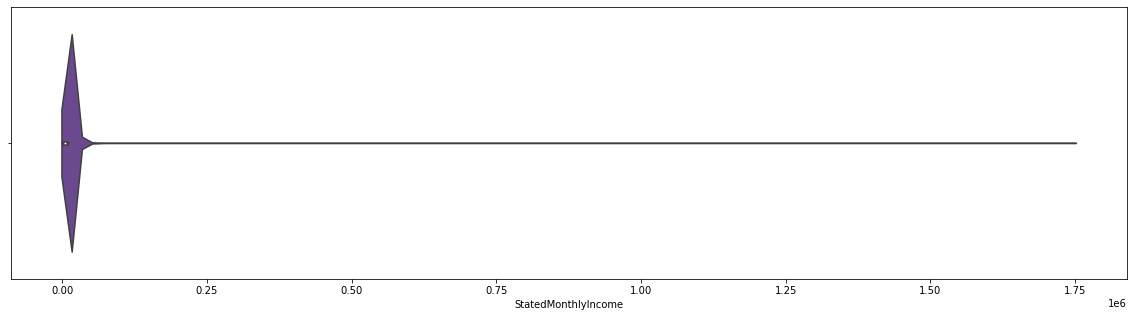

In [35]:
# to investigate the chart further
plt.figure(figsize = [20,5])
base_color = sns.color_palette("Paired")[9]
sns.violinplot(data = loancopy, x = 'StatedMonthlyIncome', color = base_color);

**Observation**: Majority of the Stated Monthly income is between 0 - 0.05 * 10^6

#### Question: What are the popular Occupations of the borrower?

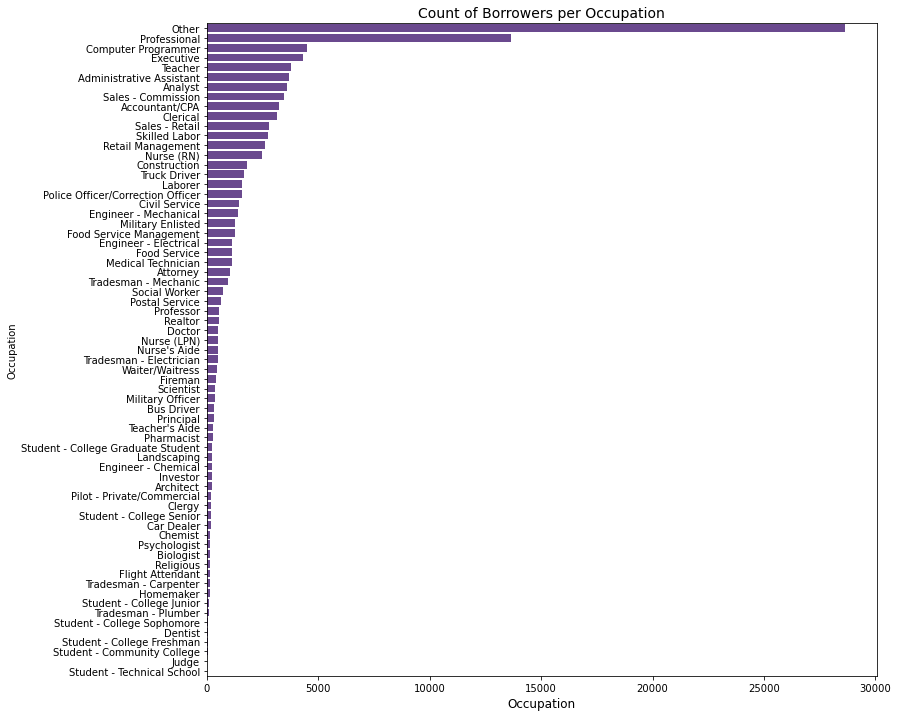

In [36]:
# the visualization
countploty('Occupation')
plt.xlabel('Occupation', fontsize = 12)
plt.title('Count of Borrowers per Occupation', fontsize = 14)
plt.show();

Among the occupation, the "other" and "Professional" was the occupation used by most of the borrowers

#### Question: What percentage of Borrowers are in Group?

False    101218
True      12719
Name: CurrentlyInGroup, dtype: int64


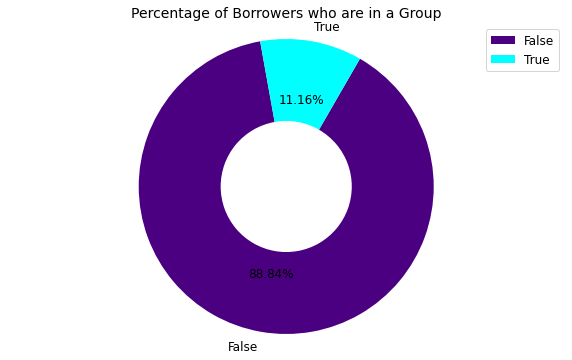

In [37]:
# the visualization
pieplot('CurrentlyInGroup')
plt.title('Percentage of Borrowers who are in a Group', fontsize = 14 )
plt.show();

**Observation**: Only 11.16% of the borrowers are in a group as at applying for the loan

#### Question: What percentage of Borrowers are in each listing category?

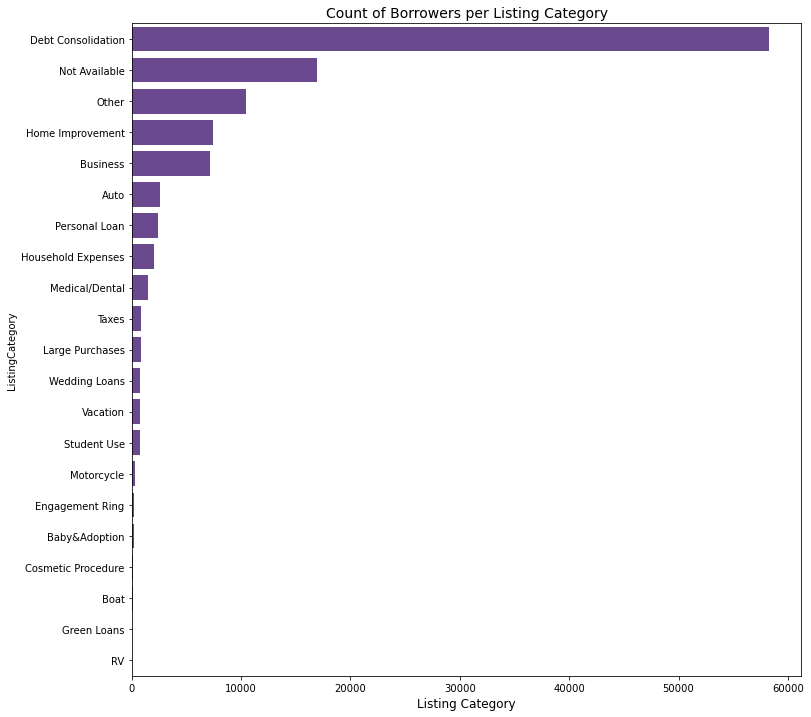

In [38]:
#visualization
countploty('ListingCategory')
plt.xlabel('Listing Category', fontsize = 12)
plt.title('Count of Borrowers per Listing Category', fontsize = 14)
plt.show();

**Observation**: Most of the Borrowers fall into the Debt Consolidation Category

#### Question: What is the distribution of the number of recommendation?

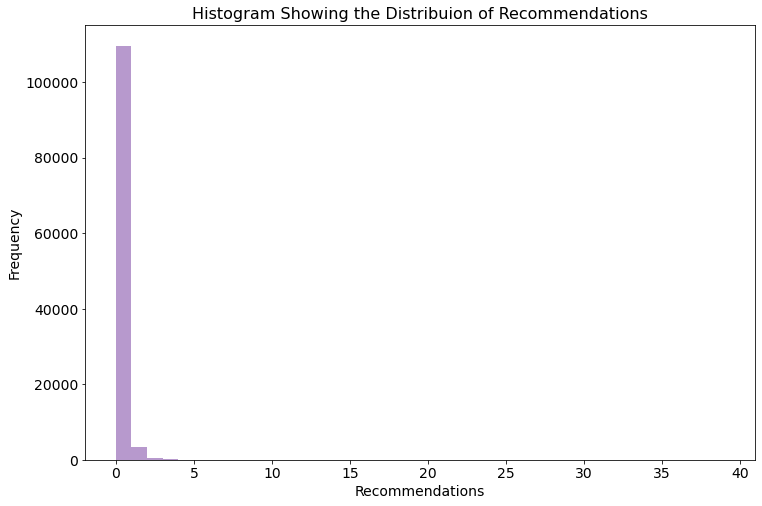

In [39]:
# the visualization
distplot('Recommendations', 1)
plt.xlabel("Recommendations", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.title("Histogram Showing the Distribuion of Recommendations", fontsize= 16)
plt.show()

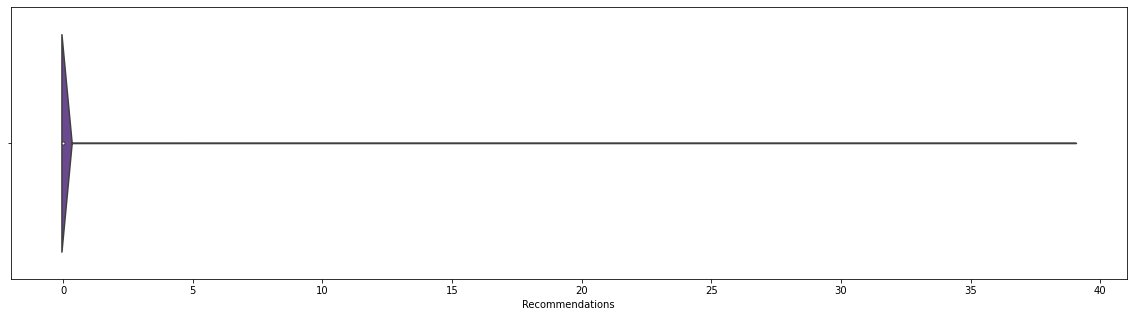

In [40]:
# to investigate the chart further
plt.figure(figsize = [20,5])
base_color = sns.color_palette("Paired")[9]
sns.violinplot(data = loancopy, x = 'Recommendations', color = base_color);

**Observation**: Most of the Borrowers didnt get recommendations but a few of them had as many as 39

#### Question: What is the distribution of the Debt to Income ratio?

debt-to-income ratio compares how much you owe each month to how much you earn

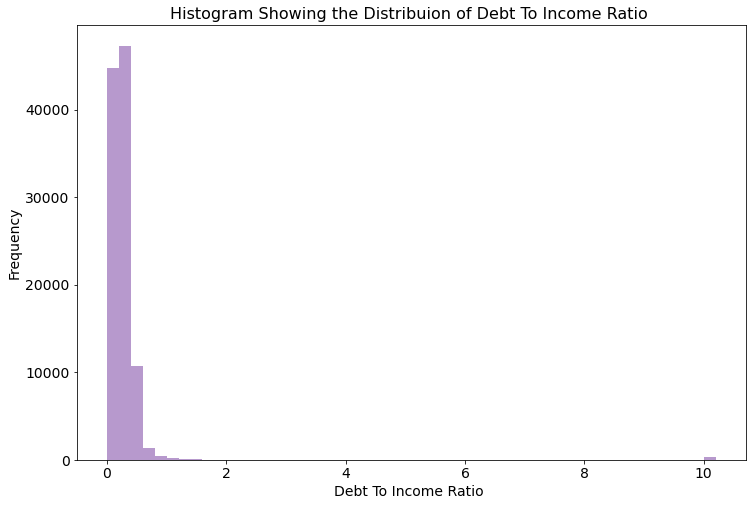

In [41]:
# the visualization
distplot('DebtToIncomeRatio', 0.2)
plt.xlabel("Debt To Income Ratio ", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.title("Histogram Showing the Distribuion of Debt To Income Ratio ", fontsize= 16)
plt.show()

**Observation**: Most of the Borrowers have Debt to Income Ration from 20% to 40%. The distribution is right skewed

#### Question: What is the count of Borrowers per prosper score?

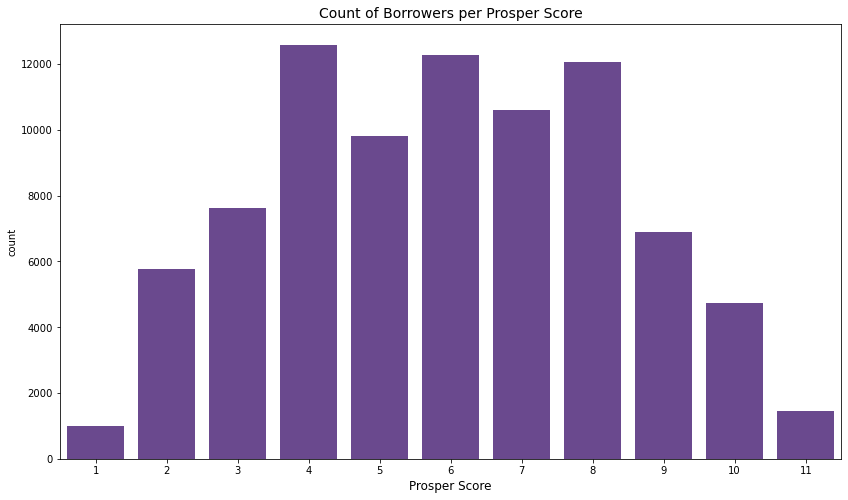

In [42]:
# the visualization
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.figure(figsize = [14,8])
base_color = sns.color_palette("Paired")[9]
sns.countplot(data=loancopy, x = 'ProsperScore', color = base_color, order = order)
plt.xlabel('Prosper Score', fontsize = 12)
plt.title('Count of Borrowers per Prosper Score', fontsize = 14)
plt.show();

**Observation**: Most of the Borrowers have their prosper score at 4 then 6 and then 8. The highest prosper score is 11

#### Question: What is the count of Borrowers per Occupation?

<Figure size 1440x864 with 0 Axes>

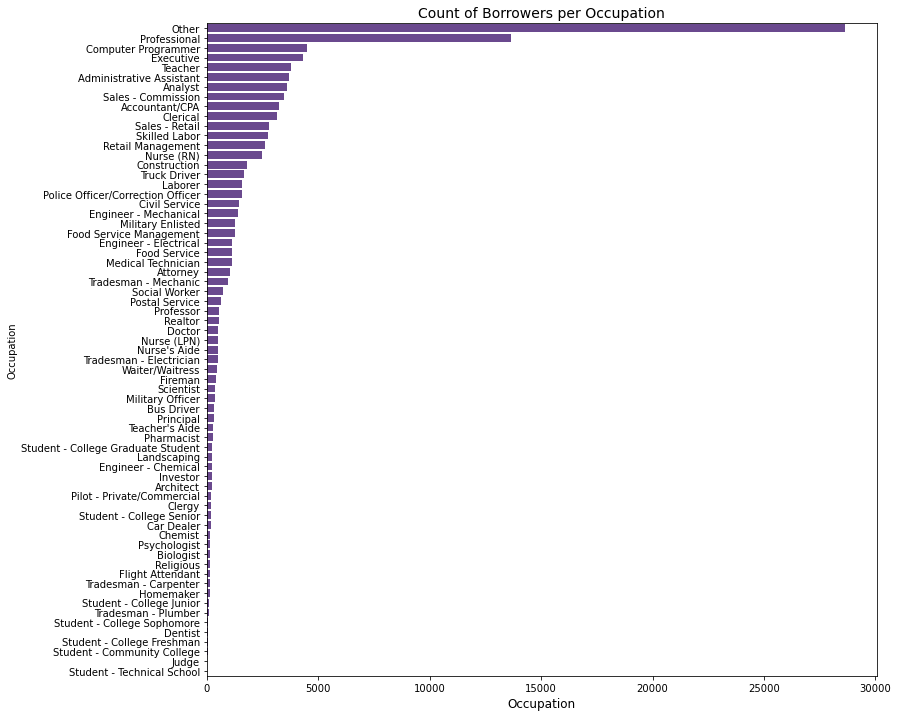

In [43]:
#visualization
plt.figure(figsize = (20, 12))
countploty('Occupation')
plt.xlabel('Occupation', fontsize = 12)
plt.title('Count of Borrowers per Occupation', fontsize = 14)
plt.show();

**Observation**: Ther are more Occupation specified as Others that are borrowers

.

## BIVARIATE ANALYSIS

According to definition, bivariate analysis examines any concurrent relationship between two variables or qualities. In order to determine whether there are any differences between the two variables and potential causes of these differences, this study examines the relationship between the two variables as well as the depth of this association.

**Question**: What is the Average monthly income of the borrowers for each Loan status

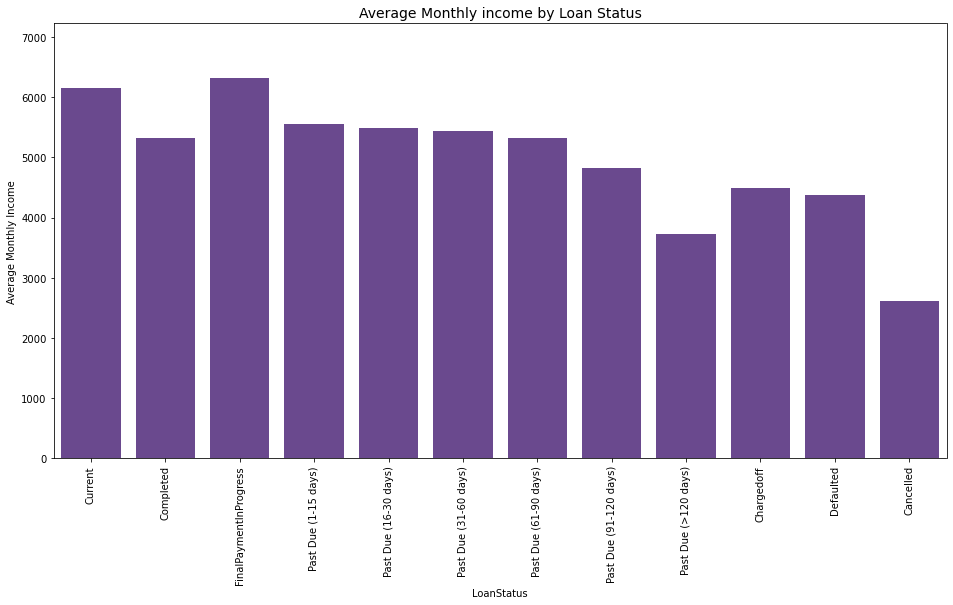

In [68]:
# the visualization
here = ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 
        'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 
        'Chargedoff', 'Defaulted', 'Cancelled']
plt.figure(figsize = [16, 8])
base_color = sns.color_palette("Paired")[9]
sns.barplot(data = loancopy, x = 'LoanStatus', y = 'StatedMonthlyIncome', color = base_color, errwidth = 0,
           order=here)
plt.ylabel("Average Monthly Income")
plt.title("Average Monthly income by Loan Status", fontsize = 14)
plt.xticks(rotation = 90);

**Observation**: It is Observed that there is a correlation between the average Monthly income and Loan Status. Borrowers with Loan Status of "Cancelled", Past Due for over 60 days etc all have low average monthly income, which could be the reason for the struggle in paying the loan, hence the loan status. 

**Question**: What is the number of listings coming in on a yearly basis?

In [45]:
# to observe the first five rows of the data
loancopy.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,...,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,TotalInquiries,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,Recommendations,ListingCategory
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,NaN,0,CO,Other,...,2.0,True,True,3.0,0.17,"$25,000-49,999",3083.333333,9425,0,Not Available
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,7.0,2,CO,Professional,...,44.0,False,False,5.0,0.18,"$50,000-74,999",6125.000000,10000,0,Home Improvement
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,Completed,0.28269,NaN,0,GA,Other,...,NaN,False,True,1.0,0.06,Not displayed,2083.333333,3001,0,Not Available
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,0.12528,9.0,16,GA,Skilled Labor,...,113.0,True,False,1.0,0.15,"$25,000-49,999",2875.000000,10000,0,Motorcycle
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,0.24614,4.0,2,MN,Executive,...,44.0,True,False,9.0,0.26,"$100,000+",9583.333333,15000,0,Home Improvement


In [46]:
# to extract the year and month from the Listing Creation Date
loancopy['Year'] = loancopy['ListingCreationDate'].dt.year
loancopy['Month'] = loancopy['ListingCreationDate'].dt.month

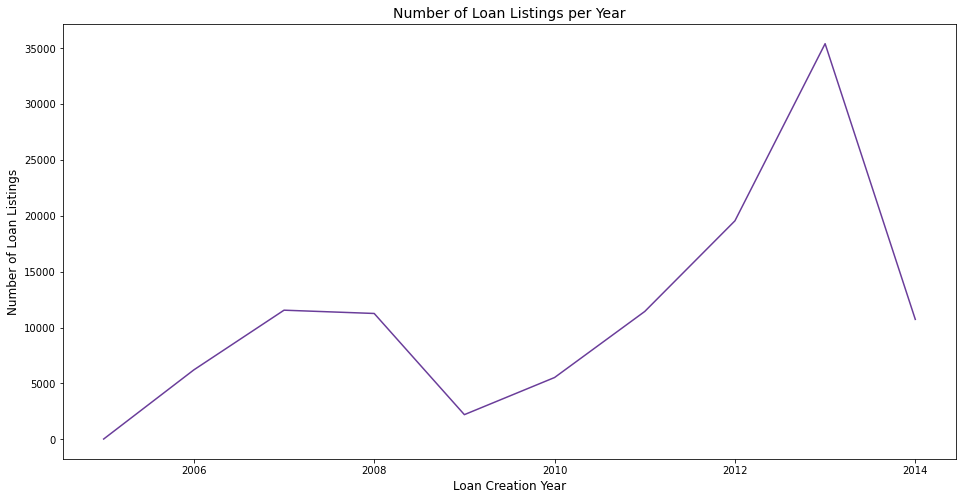

In [47]:
# to group by the years 
year_grouped = loancopy['Year'].value_counts().sort_index()
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.lineplot(x = year_grouped.index, y = year_grouped, color = base_color)
plt.xlabel('Loan Creation Year', fontsize = 12)
plt.ylabel('Number of Loan Listings', fontsize = 12)
plt.title('Number of Loan Listings per Year', fontsize = 14)
plt.show()

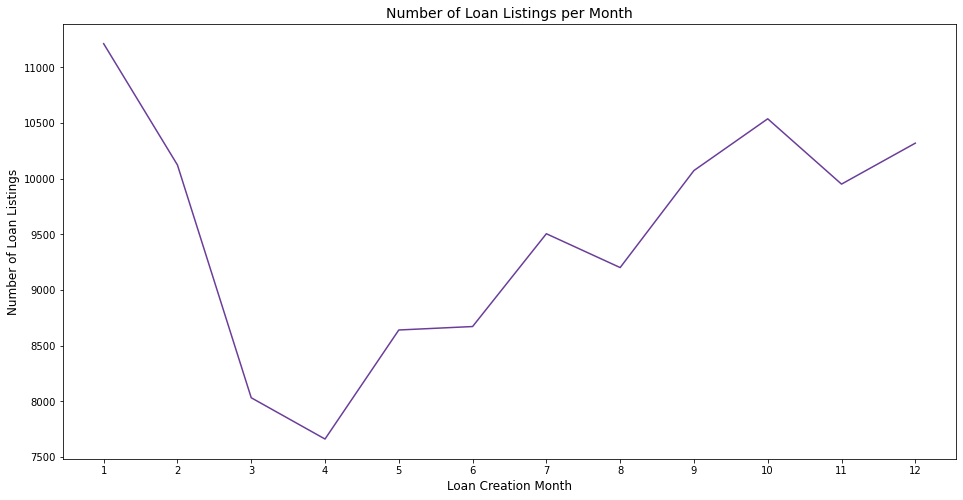

In [48]:
# to group by the years 
month_grouped = loancopy['Month'].value_counts().sort_index()
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.lineplot(x = month_grouped.index, y = month_grouped, color = base_color)
plt.xlabel('Loan Creation Month', fontsize = 12)
plt.ylabel('Number of Loan Listings', fontsize = 12)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Number of Loan Listings per Month', fontsize = 14)
plt.show()

**Observation**: 2013 recorded the year with the highest number of loan requests. On a monthly observation, January has the highest number of loan requests compared to other months, 

**Question**: What is the distribution of loan status for each term?

<Figure size 1152x576 with 0 Axes>

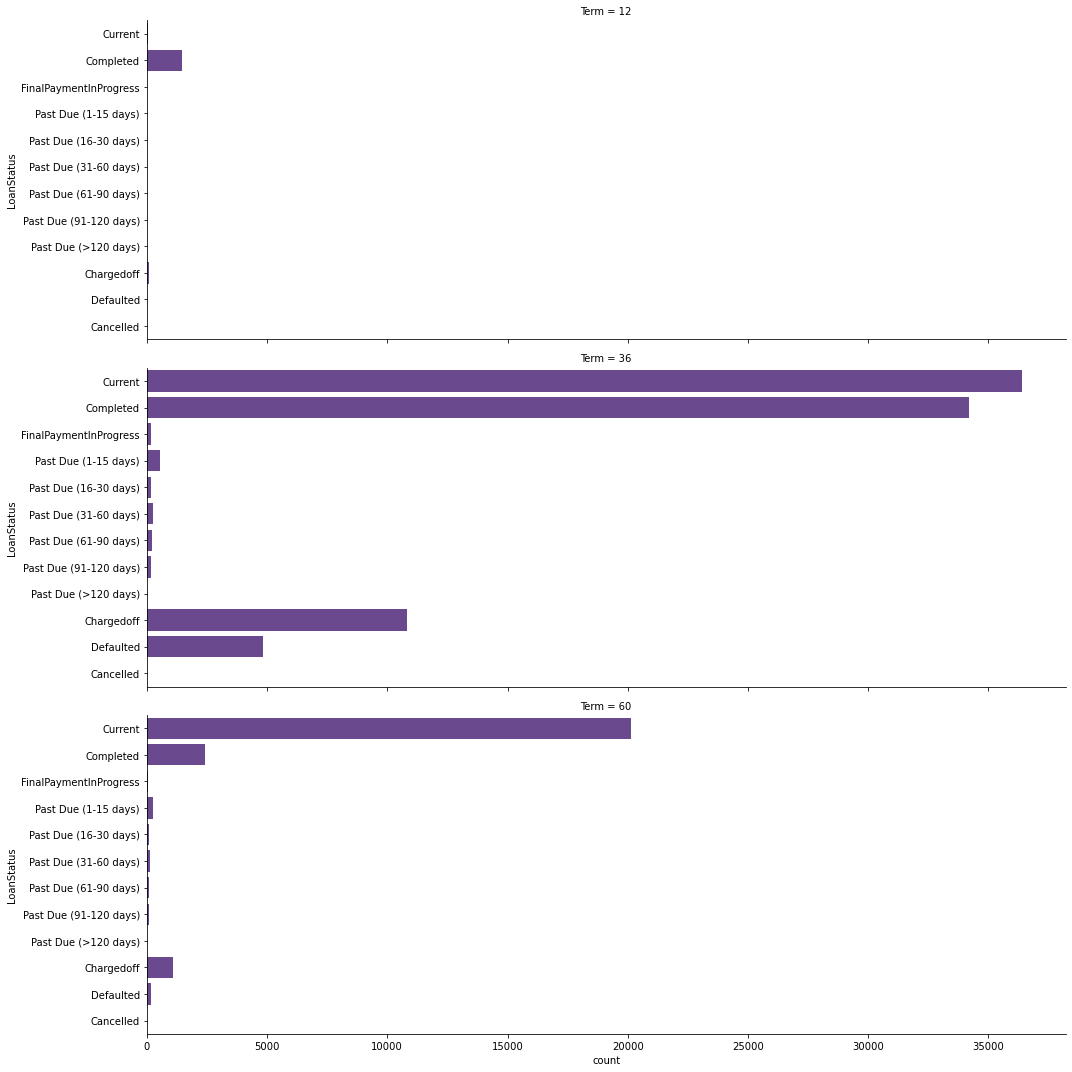

In [69]:
# the visualization
here = ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 
        'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 
        'Chargedoff', 'Defaulted', 'Cancelled']
plt.figure(figsize = [16, 8])
base_color = sns.color_palette("Paired")[9]
sns.catplot(y = 'LoanStatus', data = loancopy, kind = 'count', color = base_color, row = 'Term', height = 5, aspect = 3, 
            order = here)
plt.show()

**Observation**: Most of the Borrowers in Term 12 have completed their loan. There are more defaulted and CHarged off loans in Term 36 compared to other terms.

**Question**: What is the income range distribution of borrowers in each term

<Figure size 1152x576 with 0 Axes>

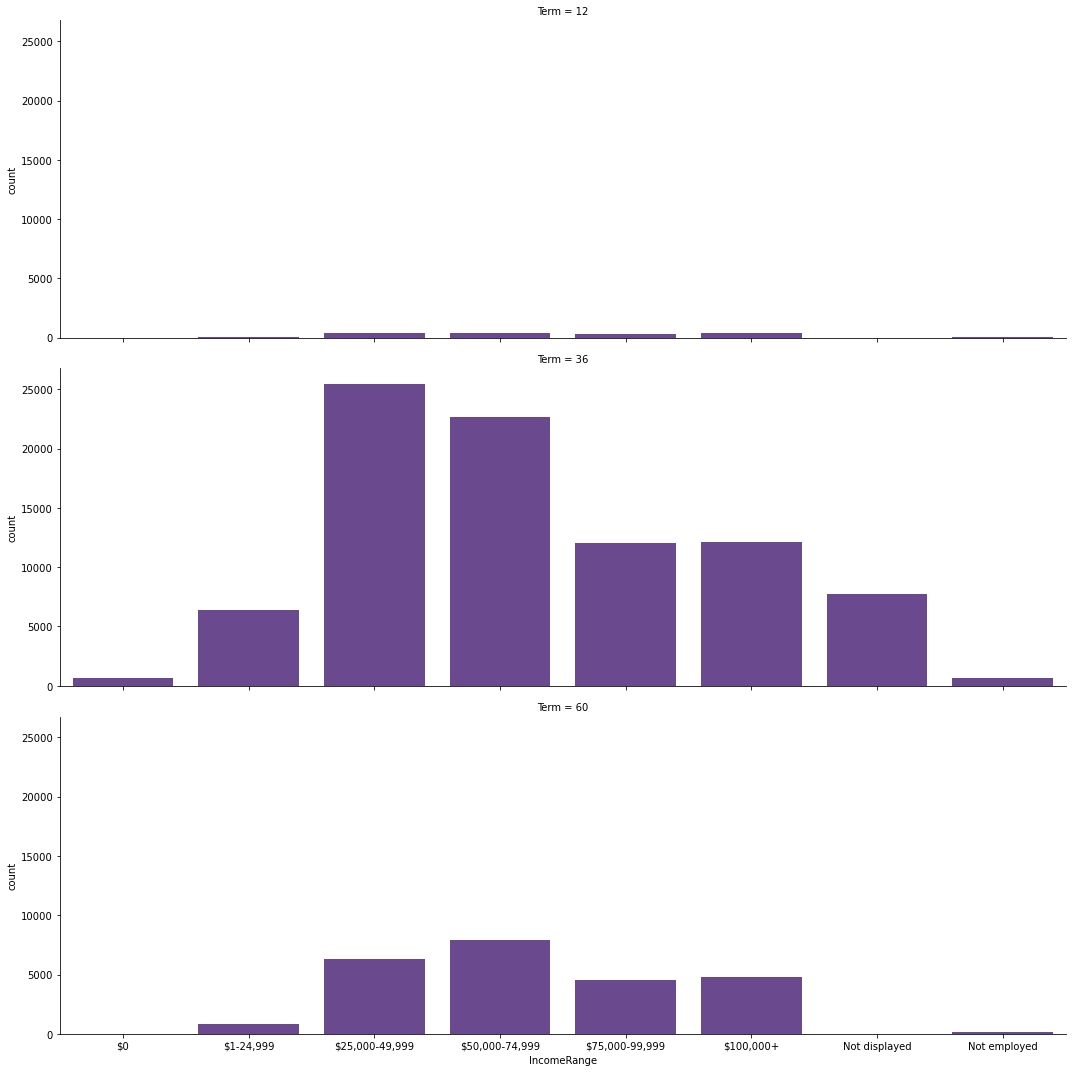

In [70]:
# the visualization
ranges = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+", 'Not displayed', 'Not employed']
plt.figure(figsize = [16, 8])
base_color = sns.color_palette("Paired")[9]
sns.catplot(x = 'IncomeRange', data = loancopy, kind = 'count', color = base_color, row = 'Term', height = 5, aspect = 3,
           order = ranges)
plt.show()

**Observation**: Most of the Borrowers in Term 36 are in the $25000 - $49,999 income range. While most borrowers in term 60 are in the $50,000 - 74,999 income range

**Question**: Does Number of recommendation affect the loan status

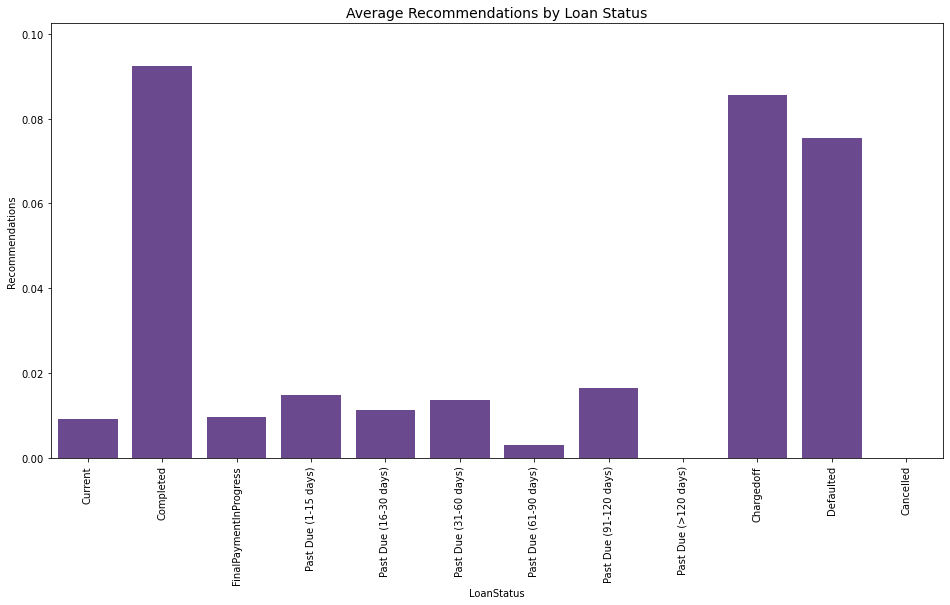

In [71]:
# the visualization
here = ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 
        'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 
        'Chargedoff', 'Defaulted', 'Cancelled']
plt.figure(figsize = [16, 8])
base_color = sns.color_palette("Paired")[9]
sns.barplot(data = loancopy, x = 'LoanStatus', y = 'Recommendations', color = base_color, errwidth = 0,
           order=here)
plt.ylabel("Recommendations")
plt.title("Average Recommendations by Loan Status", fontsize = 14)
plt.xticks(rotation = 90);

**Observation**: From the chart above, "Completed" Loan Status has more recommendations on Average. Number of Recommendations might influence Loan Status 

**Question**: What is the distribution of Income to Debt ratio for each Prosper score

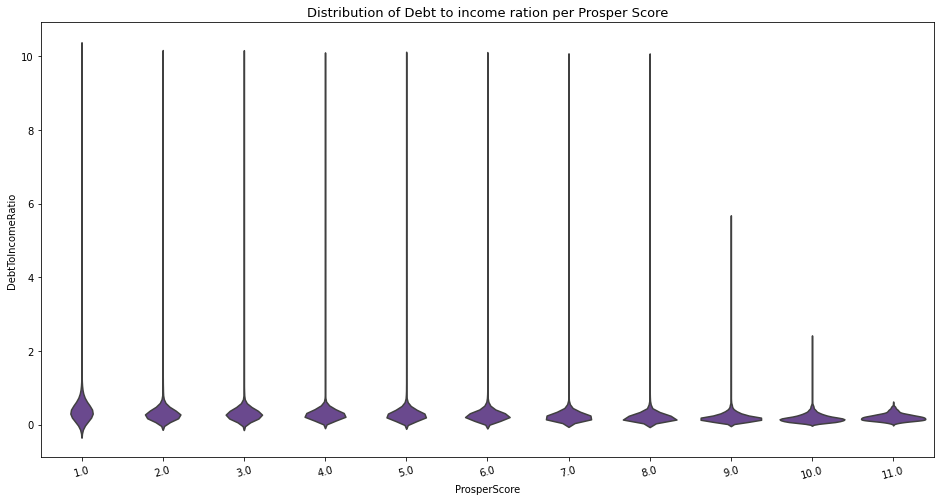

In [52]:
# visualization
plt.figure(figsize= (16,8))
base_color = sns.color_palette("Paired")[9]
sns.violinplot(data= loancopy, x='ProsperScore', y='DebtToIncomeRatio', color=base_color, inner=None)
plt.title('Distribution of Debt to income ration per Prosper Score', fontsize = 13)
plt.xticks(rotation=15);

**Observation**: Borrowers with High Prosper score have lower Income to Debt Ratio

**Question**: What is the distribution of Borrowers APR by Term

<Figure size 1152x576 with 0 Axes>

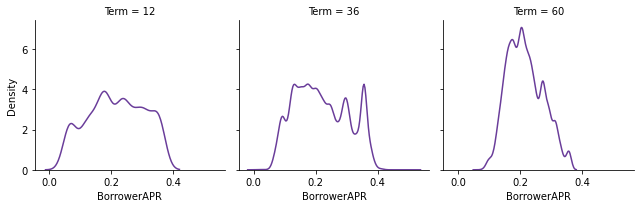

In [53]:
# the visualization
plt.figure(figsize= (16,8))
base_color = sns.color_palette("Paired")[9]
g = sns.FacetGrid(data = loancopy, col = 'Term')
g.map(sns.kdeplot, 'BorrowerAPR', color = base_color)

**Observation**: This shows that the density of borrowers with 0.2 APR in term 60 is bigger compared to other Borrower APR

**Question**: What is the distribution of Debt to Income ratio for each Employment status

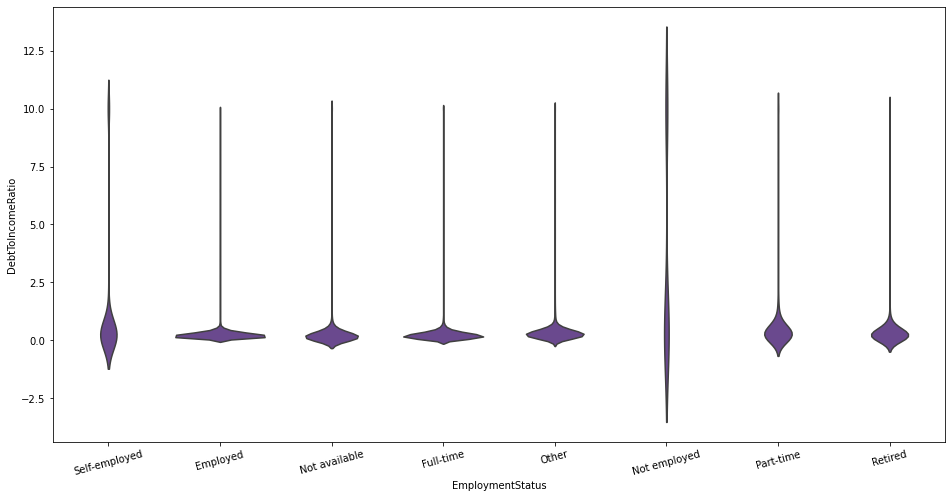

In [54]:
# visualization
plt.figure(figsize= (16,8))
base_color = sns.color_palette("Paired")[9]
sns.violinplot(data= loancopy, x='EmploymentStatus', y='DebtToIncomeRatio', color=base_color, inner=None)
plt.xticks(rotation=15);

**Observation**: The "Not Employed" Employment status has the highest Debt to Income ratio compared to other Employment Status.

**Question**: What is the relationship between stated monthly income and Loan Original Amount

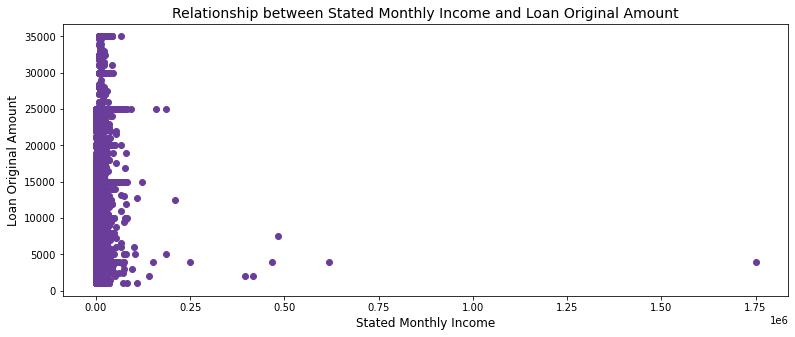

In [55]:
# the visualization
plt.figure(figsize=(13,5)) 
base_color = sns.color_palette("Paired")[9]
plt.scatter(loancopy['StatedMonthlyIncome'], loancopy['LoanOriginalAmount'], color=base_color)
plt.xlabel('Stated Monthly Income', fontsize = 12)
plt.ylabel('Loan Original Amount', fontsize = 12)
plt.title('Relationship between Stated Monthly Income and Loan Original Amount', fontsize = 14)
plt.show()

**Observation**: No relationship seen in this visual

**Question**: What are the borrowers employee status distribution per team

<Figure size 1152x576 with 0 Axes>

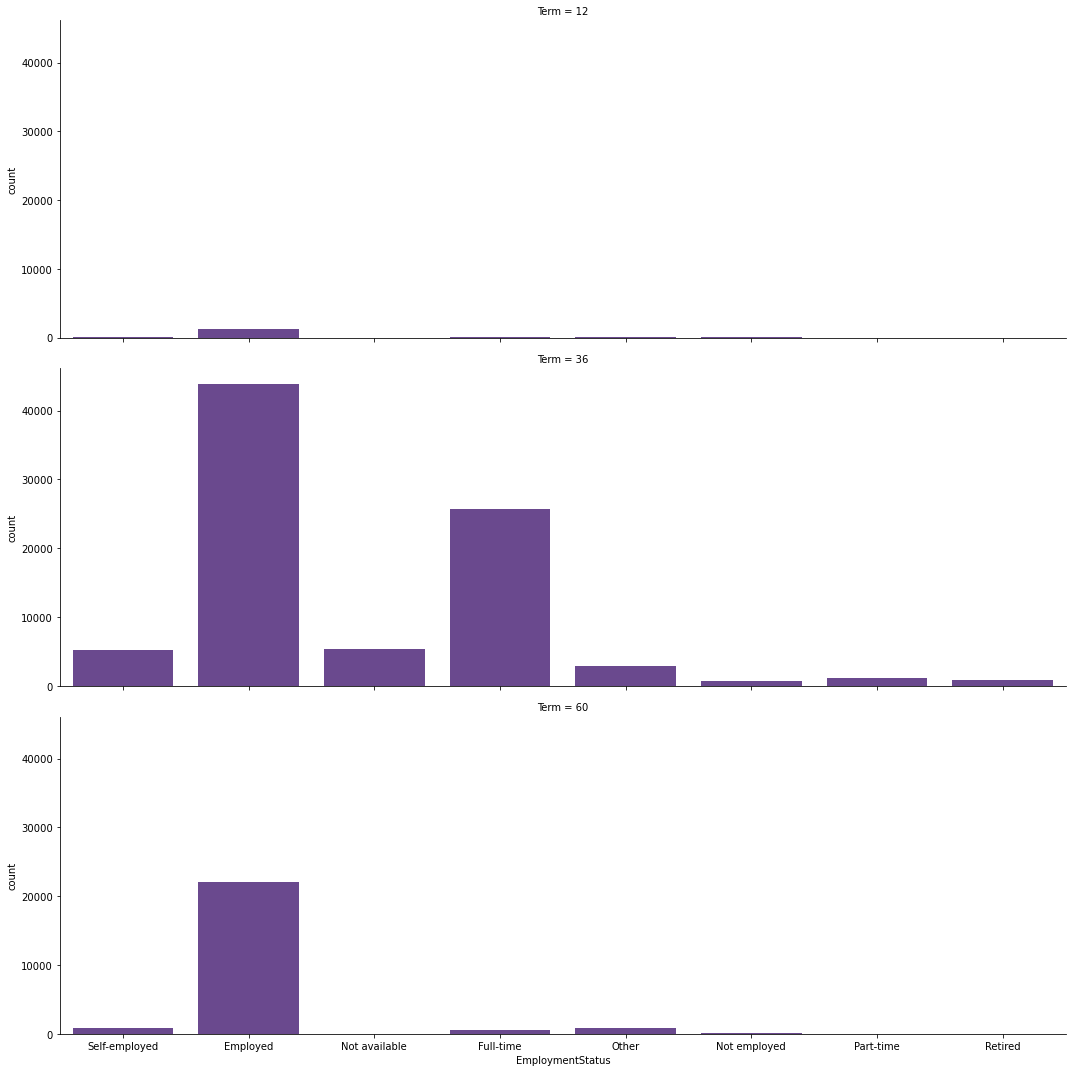

In [56]:
# the visualization
plt.figure(figsize = [16, 8])
base_color = sns.color_palette("Paired")[9]
sns.catplot(x = 'EmploymentStatus', data = loancopy, kind = 'count', color = base_color, row = 'Term', height = 5, aspect = 3)
plt.show()

**Observation**: From the Charts above, we can say that most of the borrowers from each term are Employed

**Question**: What is the average Debt to income ratio for each Employment status

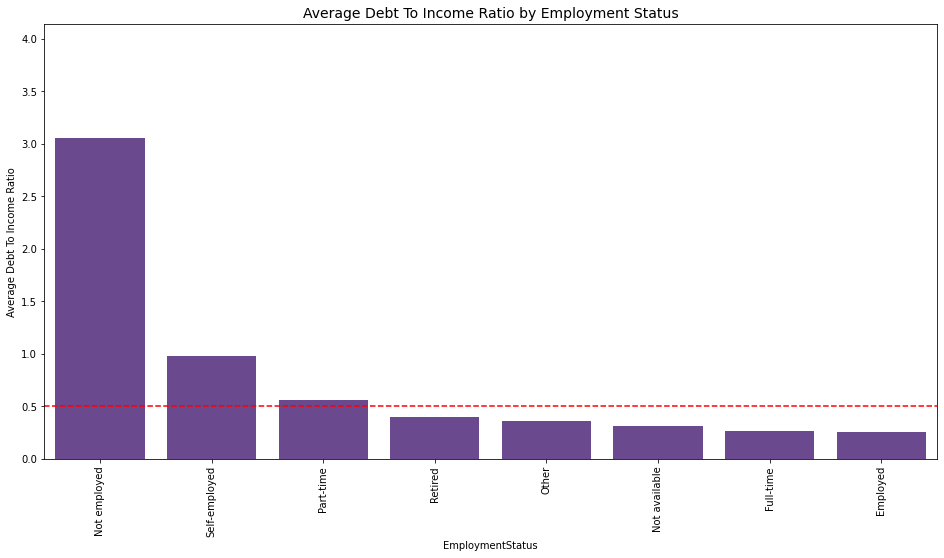

In [57]:
# the visualization
status = loancopy.groupby('EmploymentStatus')['DebtToIncomeRatio'].mean()
status = status.sort_values(ascending = False).index
plt.figure(figsize = [16, 8])
base_color = sns.color_palette("Paired")[9]
sns.barplot(data = loancopy, x = 'EmploymentStatus', y = 'DebtToIncomeRatio', color = base_color, errwidth = 0,
           order= status)
plt.ylabel("Average Debt To Income Ratio")
plt.title("Average Debt To Income Ratio by Employment Status", fontsize = 14)
plt.axhline(y = 0.5, linestyle = '--', color = 'r')
plt.xticks(rotation = 90);

**Observation**: According to [investopedia](https://www.investopedia.com/terms/d/dti.asp#:~:text=for%20a%20mortgage.-,Ideally%2C%20lenders%20prefer%20a%20debt%2Dto%2Dincome%20ratio%20lower,a%20mortgage%20or%20rent%20payment.), A general rule of thumb is to keep your overall debt-to-income ratio at or below 43%. Debt To Income ratio greater than 50% means that the borrower is not in a good place financially to take loan. From the chart above, Borrowers who are "Not Employed" are in a bad financial situation to be taking loans. Borrowers who are "Employed", "Full time", "Not Available", "Other" and "Retired" on average are in a good place financially to be taking loans.

**Question**: To explore the relationship between the Income range and Loan status of the borrowers

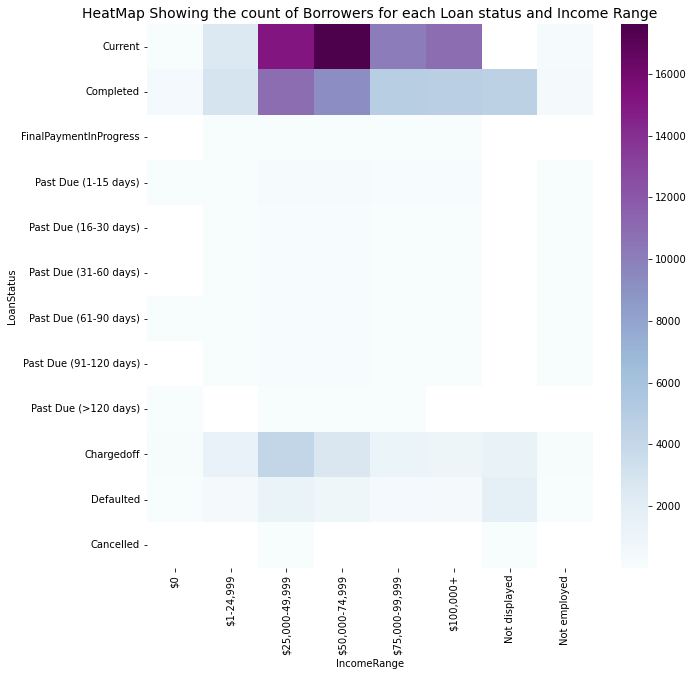

In [72]:
# visualization
score = loancopy.groupby(['LoanStatus', 'IncomeRange']).size()
score = score.reset_index(name = 'count')
score = score.pivot(index = 'LoanStatus', columns = 'IncomeRange', values = 'count')
score.index = pd.CategoricalIndex(score.index, categories = ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Chargedoff', 'Defaulted', 'Cancelled'])
score.sort_index(level = 0, inplace = True)
range = ['$0', "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", '$100,000+', 'Not displayed', 'Not employed']
score = score.reindex(range, axis = 1)
sns.heatmap(score, cmap = 'BuPu')
plt.title('HeatMap Showing the count of Borrowers for each Loan status and Income Range', fontsize = 14);

**Observation**: There are more borrowers within the completed and current Loan status. More of them hvae an income range within $25000+ 

Most of the borrowers who defaulted have income range not displayed

**Question**: To explore the relationship between the Employment Status and the Recommendation bin of the Borrowers

To approach this, I start by creating bins for the number of recommendations which are as follows
- 0 recommendations be termed as "No Recommendations"
- 1 - 10 recommendations be termed as "1 - 10"
- 10 - 20 recommendations be termed as "10 - 20"
- 21 and above recommendations be termed as "21+"

In [59]:
# creating the recommendation group columns
bins = [-1, 0, 10, 20, 100]
labels = ["No recommendation", "1 - 10", "11 - 20", "21+"]
loancopy['recommendation group'] = pd.cut(loancopy['Recommendations'], bins, labels = labels, include_lowest = False)

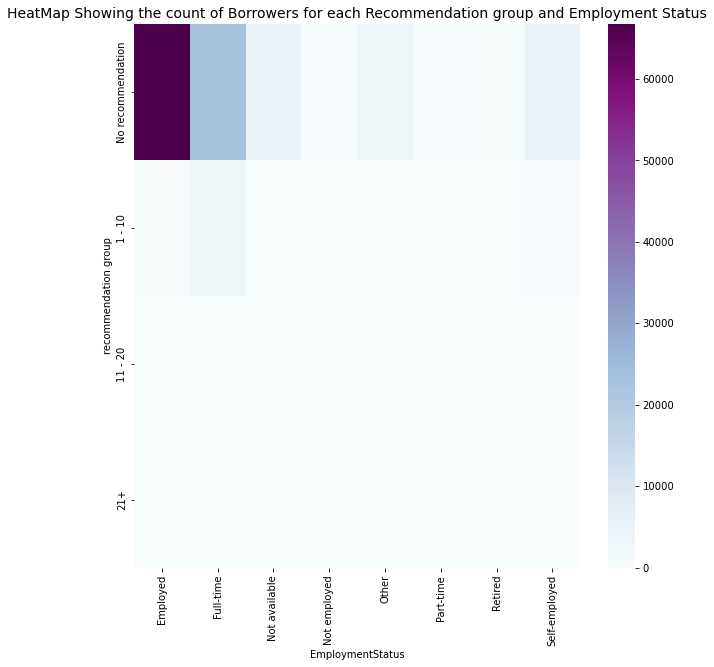

In [60]:
# the visualization

group = loancopy.groupby(['EmploymentStatus', 'recommendation group']).size()
group = group.reset_index(name = 'count')
group = group.pivot(index = 'recommendation group', columns = 'EmploymentStatus', values = 'count')
sns.heatmap(group, cmap = 'BuPu')
plt.title('HeatMap Showing the count of Borrowers for each Recommendation group and Employment Status', fontsize = 14);

**Observation**: From the chart above, most of the borrowers did not get recommendations especially the Employed borrowers. 

**Question**: What is the number of Borrowers coming from each Occupation, in each term

<Figure size 1152x1584 with 0 Axes>

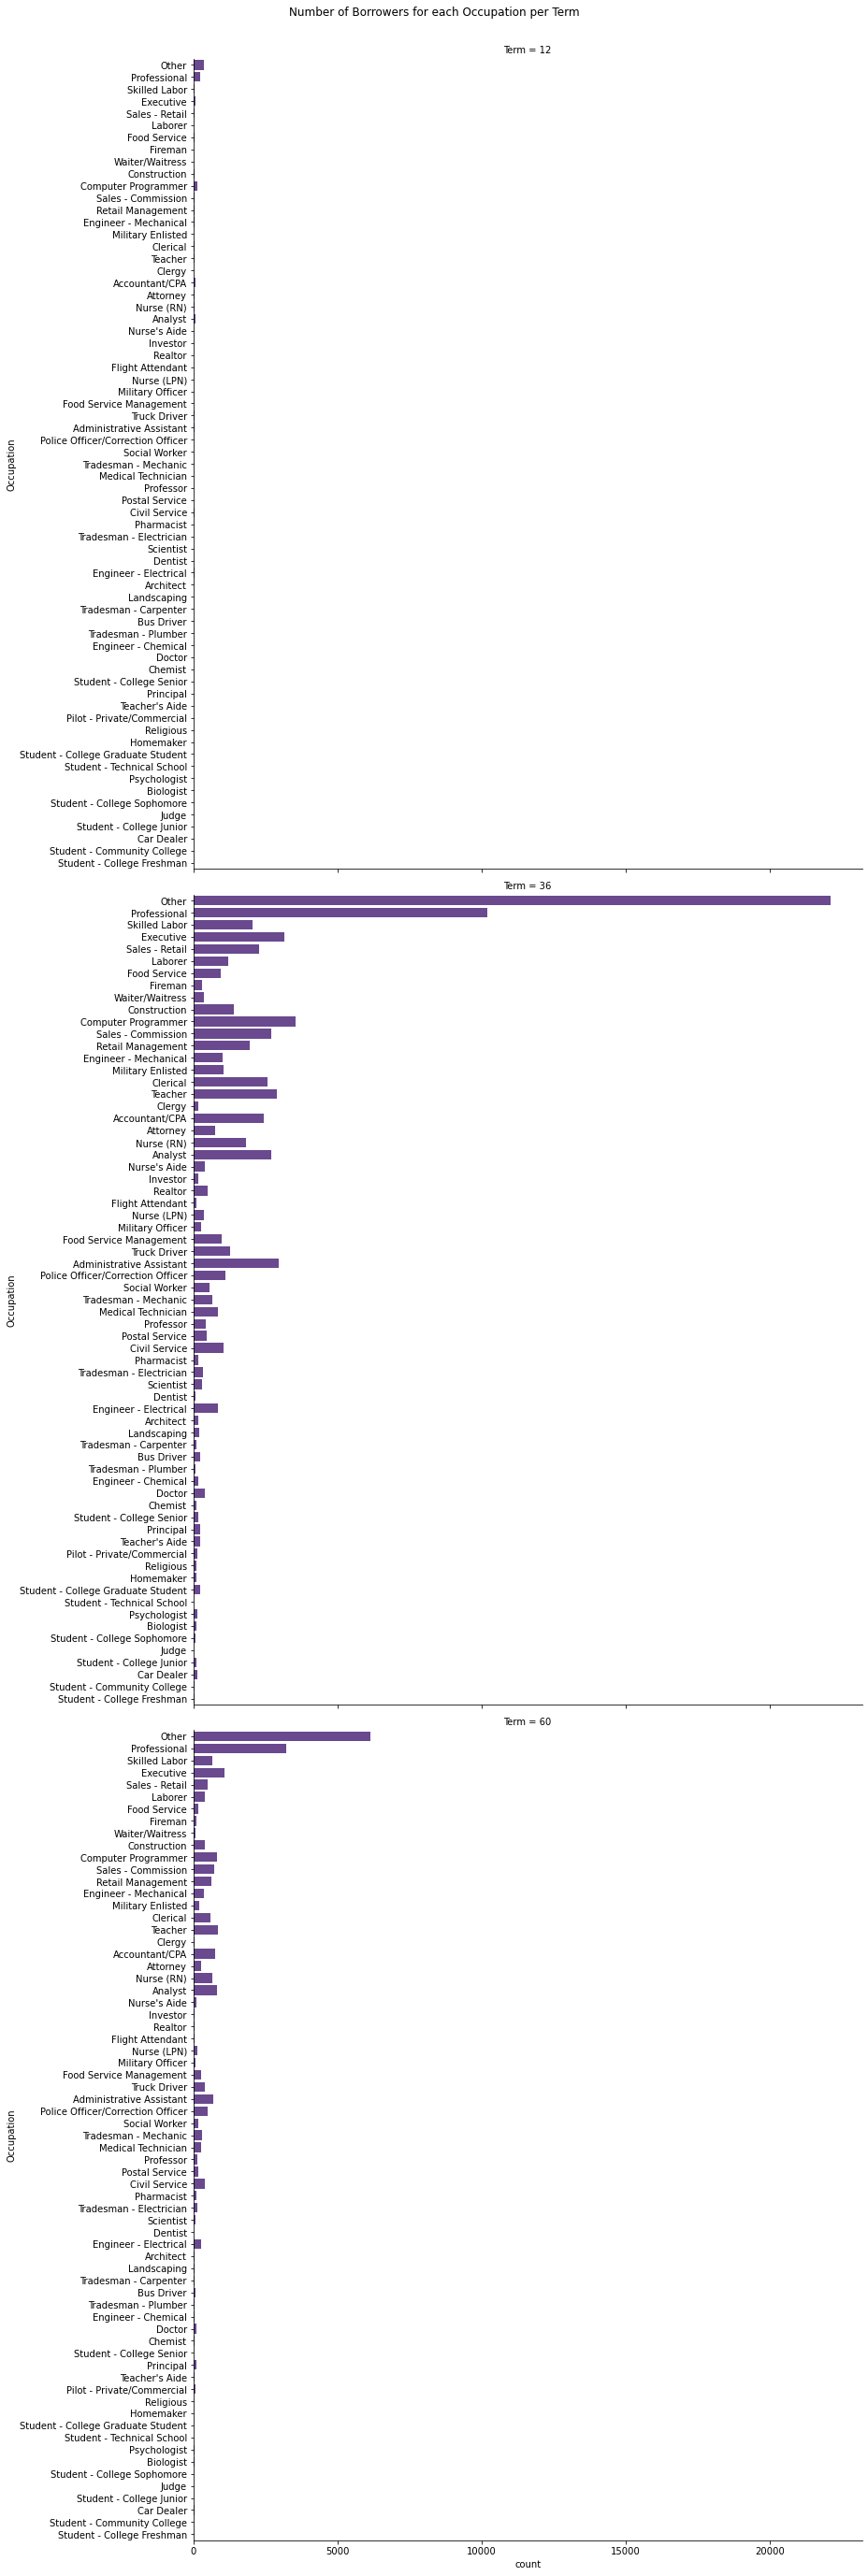

In [61]:
# the visualization
plt.figure(figsize = [16, 22])
base_color = sns.color_palette("Paired")[9]
rel = sns.catplot(y = 'Occupation', data = loancopy, kind = 'count', color = base_color, row = 'Term', height = 13, aspect = 1)
rel.fig.subplots_adjust(top= 0.96)
rel.fig.suptitle('Number of Borrowers for each Occupation per Term')
plt.show();

**Observation**: There are more of Borrowers in the "Other" occupation in each term.

**Question**: The Occupation earning the most and the least Monthly Income

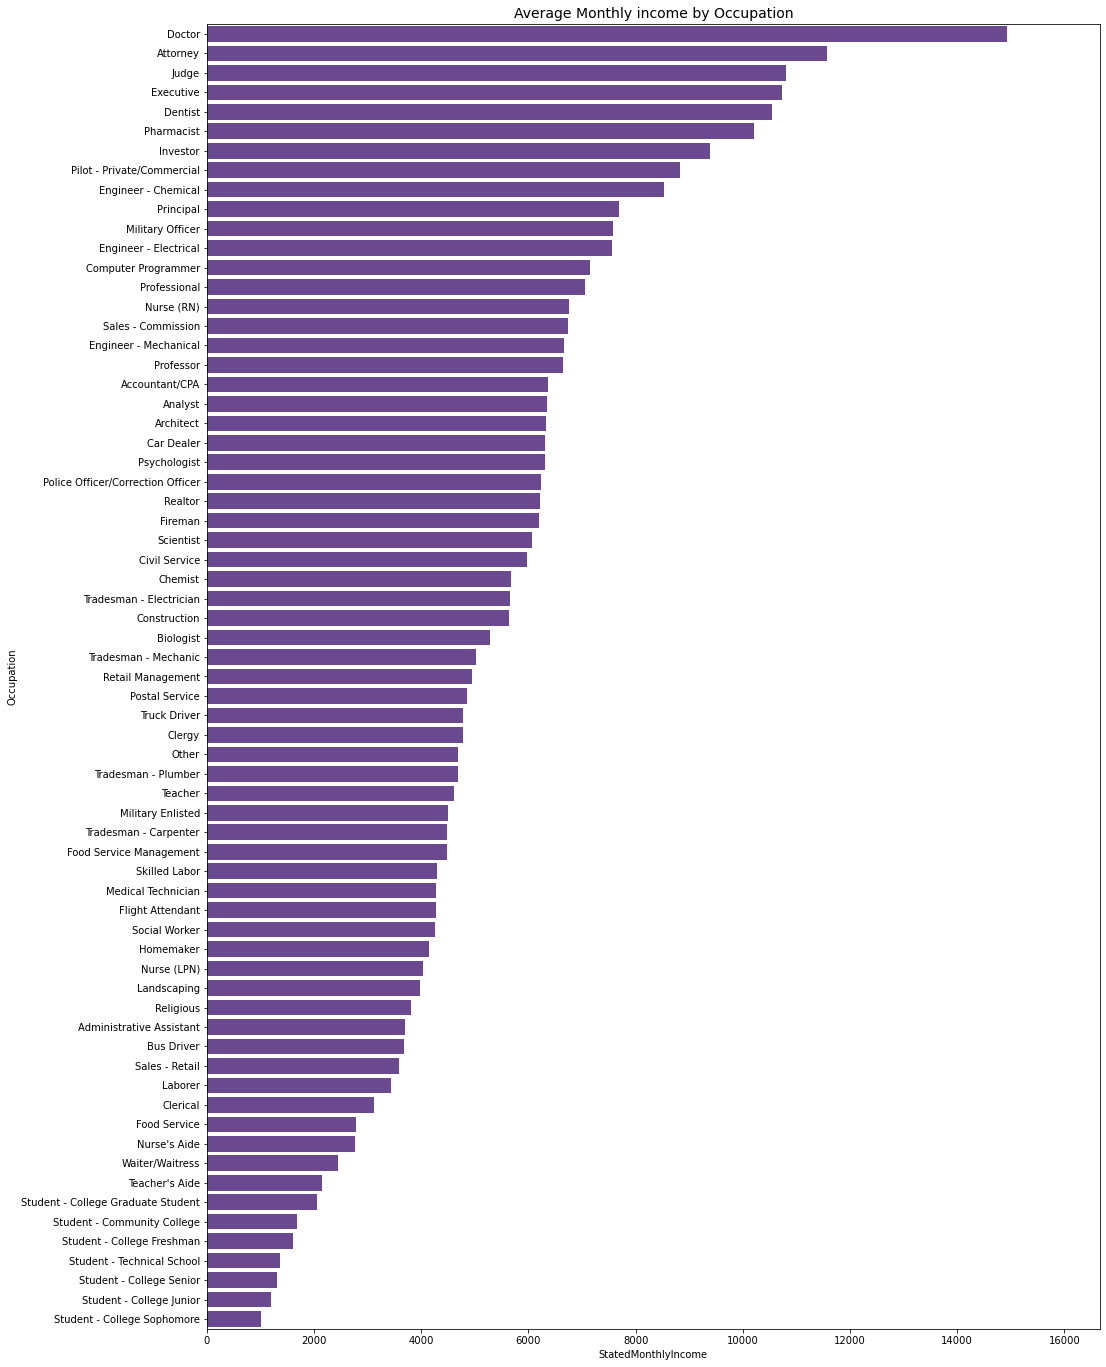

In [62]:
# the visualization
Occupation = loancopy.groupby('Occupation')['StatedMonthlyIncome'].mean()
Occupation = Occupation.sort_values(ascending = False).index
plt.figure(figsize = [16, 24])
base_color = sns.color_palette("Paired")[9]
sns.barplot(data = loancopy, y = 'Occupation', x = 'StatedMonthlyIncome', color = base_color, errwidth = 0,
           order= Occupation)
plt.ylabel("Occupation")
plt.title("Average Monthly income by Occupation", fontsize = 14)
plt.xticks(rotation = 0);

**Observation**: The top Earning Occapation per month are Doctor, Attorney, Judge, Executive and Dentist. The least Earning Occupation are Students, Teacher, Waiter/Waitress, Nurses and Food Service.

.

## MULTIVARIATE ANALYSIS

Numerous variables are taken into account in multivariate analysis. When there are numerous variables or observations for each unit or person, the analysis of the data is referred to be multivariate.

**Question**: I want to Observe the Income to Debt Ratio of the Borrowers as it relates to their Loan status and Income range 

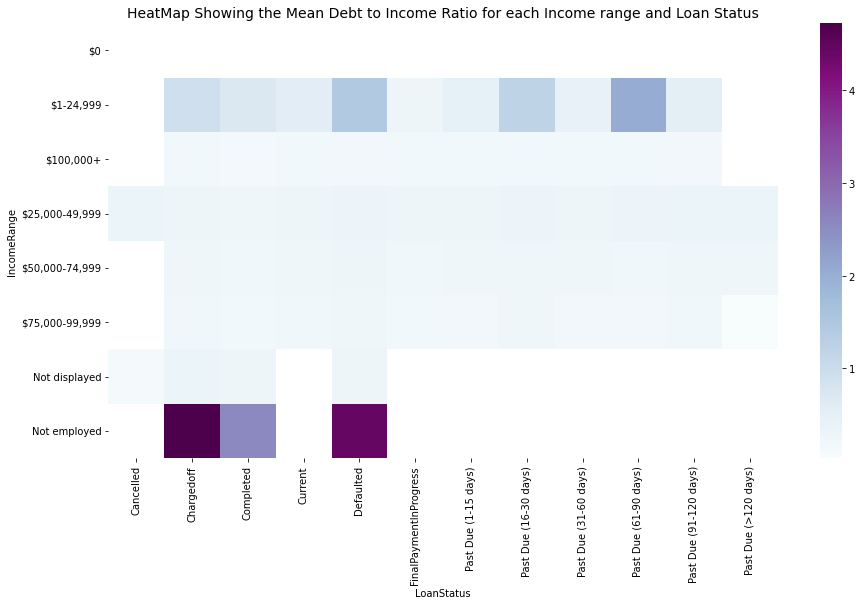

In [63]:
# visualization
plt.figure(figsize = (15,8))
group = loancopy.groupby(['IncomeRange', 'LoanStatus'])['DebtToIncomeRatio'].mean()
group = group.reset_index(name = 'mean Debt to Income Ratio')
group = group.pivot(index = 'IncomeRange', columns = 'LoanStatus', values = 'mean Debt to Income Ratio')
sns.heatmap(group, cmap = 'BuPu')
plt.title('HeatMap Showing the Mean Debt to Income Ratio for each Income range and Loan Status', fontsize = 14);

**Observation**: From the Visualization above, The higher Debt to Income Ratio were observed for Borrowers that were Not Employed and Borrowers earning $1 - 24999

**Question**: What is the Average Debt to Income Ratio for each Employment status in each term 

<Figure size 864x504 with 0 Axes>

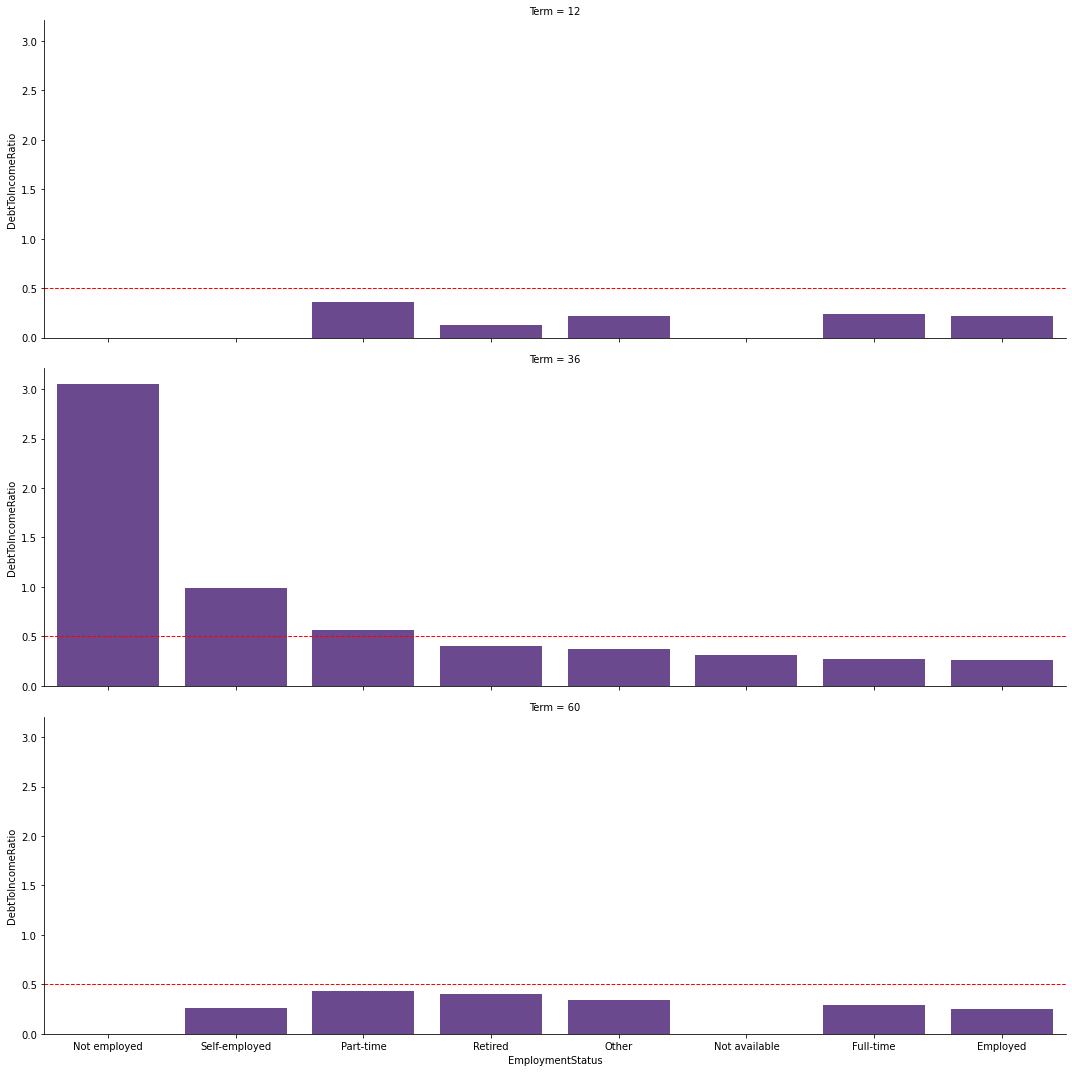

In [64]:
# visualization
plt.figure(figsize = (12, 7))
base_color = sns.color_palette("Paired")[9]
loaned = loancopy.groupby('EmploymentStatus')['DebtToIncomeRatio'].mean().sort_values(ascending = False)
g = sns.catplot(x = 'EmploymentStatus', y = 'DebtToIncomeRatio', kind = 'bar', data = loancopy, ci = None, 
            order = loaned.index, color = base_color, height = 5, aspect = 3, row = 'Term')
g.refline(y = 0.5, color = "red", lw = 1)


**Observation**: From the viz and using the benchmark of 50% for the Debt to Income ratio, we can see that all the borrowers in Term 60 and Term 12 do not exceed the benchmark which means that they are not struggling with their loan. In term 36, Borrowers that are Not Employed, Self Employed and Part time for their Employment status are the individuals who have thier average Debt to Income ratio above 0.5, therefore they mostly struggle with paying their loan

**Question**: I want to observe the loan amount with respect to the Borrowers income range and Loan status

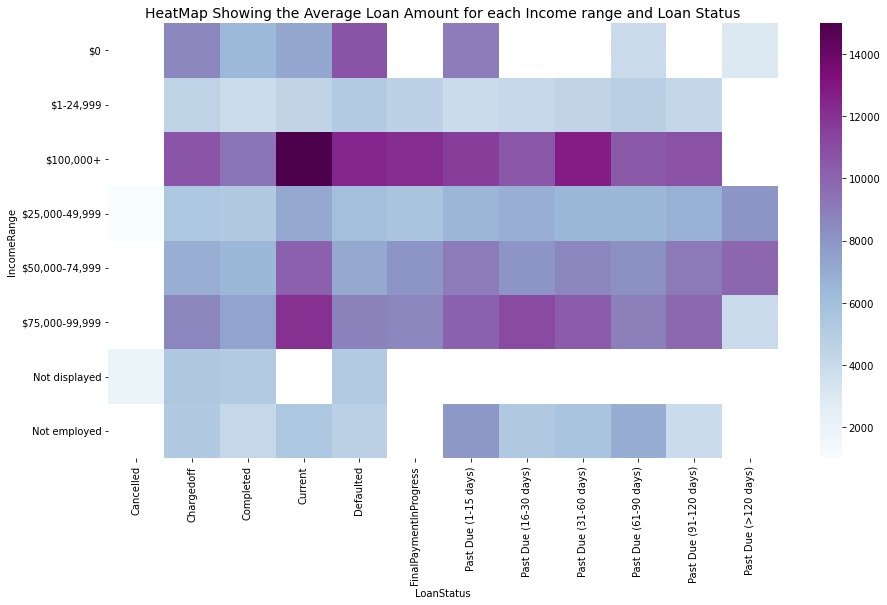

In [65]:
# visualization
plt.figure(figsize = (15,8))
group = loancopy.groupby(['IncomeRange', 'LoanStatus'])['LoanOriginalAmount'].mean()
group = group.reset_index(name = 'Average Loan Amount')
group = group.pivot(index = 'IncomeRange', columns = 'LoanStatus', values = 'Average Loan Amount')
sns.heatmap(group, cmap = 'BuPu')
plt.title('HeatMap Showing the Average Loan Amount for each Income range and Loan Status', fontsize = 14);

**Observation**: From the chart, it is observed that borrowers with high income range request for high loan amount. The Borrowers with the highest Loan amount have an income range of $100000 + and are in the Current Loan Status

**Question**: To study the Debt to Income ratio between the Term and House Owner

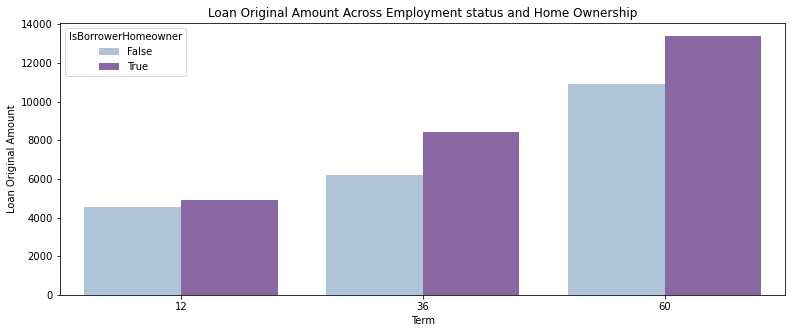

In [66]:
plt.figure(figsize=[13,5])
sns.barplot(data = loancopy, x = 'Term', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
            palette = 'BuPu',ci = None)
plt.title('Loan Original Amount Across Employment status and Home Ownership')
plt.ylabel('Loan Original Amount')
plt.show()

**Observation**: From the Viz above, Home Owners request for more Loan than Borrowers who are not home owners. Borro

.

## CONCLUSION

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The Main Feature of Interest for me was the "Debt to Income Ratio" which I used to study the set of Borrowers who are stuggling with their loan. It shows that people who are not employed struggle with their loan more than other borrowers

#### Main Findings


1. The top Earning Occapation per month are Doctor, Attorney, Judge, Executive and Dentist. The least Earning Occupation are Students, Teacher, Waiter/Waitress, Nurses and Food Service.


2. Borrowers in the Term 60 request for more loan than in other terms


3. Most of the Borrowers who are not employed struggle with their loan


4. There were more Loan listings in 2013 compared to other years. January is the time of the Year with the most recorded number of loans


5. Home Owners request for more loan than Borrowers who are not home owners.


6. Recommandations does not influence loan status


7. Most of the Loan listing are for Borrowers in the Debt Consollidation category

In [73]:
# to save the clean and transformed dataset to a csv
loancopy.to_csv('prosperLoanData_cleaned.csv')